This project aims to discover how “Greenthumb community gardens” areas in a neighborhood affect housing prices and rental rates in New York City. Two datasets have been used for analysis <br>

<b>(1) DOF: Condominium comparable rental income – Manhattan - FY 2010/2011: </b> <br>
The Department of Finance (DOF) is required by NY State law to value condominiums or cooperatives as if they were residential rental apartment buildings. DOF uses income information from rental properties similar in physical features and location to the condominiums or cooperatives. DOF applies this income data to the condominium or cooperative and determine its value in the same way DOF values rental apartment buildings.<br>

link: https://data.cityofnewyork.us/Housing-Development/DOF-Condominium-comparable-rental-income-Manhattan/ikqj-pyhc"

<b>(2) NYC Greenthumb Community Gardens: </b>
<br>
Listing of NYC Greenthumb community gardens. <br>
link: https://data.cityofnewyork.us/Environment/NYC-Greenthumb-Community-Gardens/ajxm-kzmj

## Import necessary modules/library

In [1]:
import pandas as pd
import numpy as np

## mapping 
import folium
import branca ## for color map

# Matplotlib and plotly modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


### Latex Parameters

In [2]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 14
    }

plt.rc('font', **font)

### Read data

In [3]:
con_df = pd.read_csv('./Condominium_comparable_rental_income.csv')
grn_df = pd.read_csv('./Greenthumb_Community_Gardens.csv')

In [4]:
con_df.describe()

Borough      Postcode     Latitude    Longitude  Community Board  \
count   1165.0   1148.000000  1148.000000  1148.000000      1148.000000   
mean       1.0  10027.805749    40.757431   -73.979742         5.486063   
std        0.0     36.833371     0.030690     0.020294         3.355275   
min        1.0  10000.000000    40.703037   -74.018002         1.000000   
25%        1.0  10012.000000    40.732912   -73.996122         3.000000   
50%        1.0  10021.000000    40.757835   -73.980875         6.000000   
75%        1.0  10026.000000    40.778647   -73.964058         8.000000   
max        1.0  10280.000000    40.868948   -73.923221        64.000000   

       Council District  Census Tract           BIN           BBL  \
count       1148.000000   1148.000000  1.139000e+03  1.139000e+03   
mean           3.925958   1865.460801  1.051211e+06  1.010252e+09   
std            2.278880   5436.822591  3.060752e+04  5.464145e+06   
min            1.000000      6.000000  1.000000e+06  1.000078e+09   
25%            2.000000     68.000000  1.020494e+06  1.005773e+09   
50%            4.000000    126.000000  1.055115e+06  1.010718e+09   
75%            6.000000    183.000000  1.081497e+06  1.014198e+09   
max           10.000000  31704.000000  1.089507e+06  1.022488e+09   

       MANHATTAN CONDOMINIUM PROPERTY Total Units  \
count                                 1165.000000   
mean                                    95.200000   
std                                    124.148005   
min                                     11.000000   
25%                                     23.000000   
50%                                     49.000000   
75%                                    120.000000   
max                                   1258.000000   

                           ...                        \
count                      ...                         
mean                       ...                         
std                        ...                         
min                        ...                         
25%                        ...                         
50%                        ...                         
75%                        ...                         
max                        ...                         

       COMPARABLE RENTAL 1  Market Value per SqFt  \
count                                 1165.000000   
mean                                   176.383064   
std                                     58.981986   
min                                     21.660000   
25%                                    142.000000   
50%                                    175.000000   
75%                                    219.000000   
max                                    365.000000   

       COMPARABLE RENTAL 1  Dist. from Coop in miles  \
count                                    1165.000000   
mean                                        0.449854   
std                                         0.510361   
min                                         0.000000   
25%                                         0.150000   
50%                                         0.350000   
75%                                         0.550000   
max                                         9.600000   

       COMPARABLE RENTAL 2  Total Units  COMPARABLE RENTAL 2  Year Built  \
count                       1103.000000                      1103.000000   
mean                         121.866727                      1950.144152   
std                          126.256665                        36.848664   
min                           11.000000                      1885.000000   
25%                           39.000000                      1920.000000   
50%                           75.000000                      1940.000000   
75%                          163.000000                      1986.000000   
max                         1112.000000                      2005.000000   

       COMPARABLE RENTAL 2  Gross SqFt  \
count           

## Preporcessing Data

### Remove NaN rows

In [5]:
con_df = con_df.dropna()

### Rename long columns

In [6]:
columns = ['boro_block_lot', 'condo_section','address','borough','postcode','latitude',
 'longitude','community_board','council_district','census_tract','BIN','BBL', 'NTA',
 'neighborhood','building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft','rent_1_boro_block_lot','rent_1_address','rent_1_neighborhood',
 'rent_1_building_classification','rent_1_total_units','rent_1_year_built','rent_1_gross_sqft','rent_1_gross_income',
 'rent_1_gross_income_psqft','rent_1_market_value','rent_1_market_value_psqft','rent_1_dist_from_coop_miles',
 'rent_2_boro_block_lot','rent_2_address','rent_2_neighborhood','rent_2_building_classification','rent_2_total_units',
 'rent_2_year_built','rent_2_gross_sqft','rent_2_gross_income','rent_2_gross_income_psqft','rent_2_market_value',
 'rent_2_market_alue_psqft','rent_2_dist_from_coop_miles']

In [7]:
con_df.columns = columns

In [8]:
print('Total number of comumns: {}'.format(len(con_df.columns)))

Total number of comumns: 46


### Process NTA name (remove white space)

In [9]:
con_df["NTA"] = con_df["NTA"].apply(lambda x: str(x).rstrip())
grn_df["NTA"] = grn_df["NTA"].apply(lambda x: str(x).rstrip())

In [10]:
np.unique(list(con_df["NTA"]))

array(['Battery Park City-Lower Manhattan',
       'Central Harlem North-Polo Grounds', 'Central Harlem South',
       'Chinatown', 'Clinton', 'East Harlem North', 'East Harlem South',
       'East Village', 'Gramercy', 'Hamilton Heights',
       'Hudson Yards-Chelsea-Flatiron-Union Square',
       'Lenox Hill-Roosevelt Island', 'Lincoln Square', 'Lower East Side',
       'Marble Hill-Inwood', 'Midtown-Midtown South',
       'Morningside Heights', 'Murray Hill-Kips Bay',
       'SoHo-TriBeCa-Civic Center-Little Italy', 'Turtle Bay-East Midtown',
       'Upper East Side-Carnegie Hill', 'Upper West Side',
       'Washington Heights North', 'Washington Heights South',
       'West Village', 'Yorkville', 'park-cemetery-etc-Manhattan'],
      dtype='<U42')

### Data description and basic statistics

In [11]:
con_df.describe()

borough      postcode     latitude    longitude  community_board  \
count   1079.0   1079.000000  1079.000000  1079.000000      1079.000000   
mean       1.0  10027.708990    40.756733   -73.980404         5.385542   
std        0.0     37.645877     0.030899     0.020128         3.366265   
min        1.0  10000.000000    40.703037   -74.018002         1.000000   
25%        1.0  10011.000000    40.732191   -73.996591         3.000000   
50%        1.0  10019.000000    40.755042   -73.981588         6.000000   
75%        1.0  10026.000000    40.778549   -73.965122         8.000000   
max        1.0  10280.000000    40.868948   -73.923221        64.000000   

       council_district  census_tract           BIN           BBL  \
count       1079.000000   1079.000000  1.079000e+03  1.079000e+03   
mean           3.862836   1778.177016  1.050344e+06  1.010089e+09   
std            2.267725   5301.001818  3.066669e+04  5.475895e+06   
min            1.000000      6.000000  1.000000e+06  1.000078e+09   
25%            2.000000     65.000000  1.019058e+06  1.005698e+09   
50%            4.000000    122.000000  1.052738e+06  1.010438e+09   
75%            5.500000    183.000000  1.080202e+06  1.014098e+09   
max           10.000000  31704.000000  1.089507e+06  1.022488e+09   

       total_units             ...               rent_1_market_value_psqft  \
count  1079.000000             ...                             1079.000000   
mean     94.370714             ...                              177.211001   
std     125.554701             ...                               58.510899   
min      11.000000             ...                               21.660000   
25%      23.000000             ...                              142.000000   
50%      48.000000             ...                              175.000000   
75%     117.000000             ...                              219.000000   
max    1258.000000             ...                              365.000000   

       rent_1_dist_from_coop_miles  rent_2_total_units  rent_2_year_built  \
count                  1079.000000         1079.000000        1079.000000   
mean                      0.440955          122.456905        1950.214087   
std                       0.516157          126.895775          36.747945   
min                       0.000000           11.000000        1885.000000   
25%                       0.150000           39.000000        1920.000000   
50%                       0.350000           75.000000        1940.000000   
75%                       0.550000          164.000000        1986.000000   
max                       9.600000         1112.000000        2005.000000   

       rent_2_gross_sqft  rent_2_gross_income  rent_2_gross_income_psqft  \
count       1.079000e+03         1.079000e+03                1079.000000   
mean        1.205264e+05         4.860660e+06                  37.861038   
std         1.379590e+05         5.818910e+06                  10.652920   
min         6.385000e+03         1.198890e+05                  10.430000   
25%         3.344300e+04         1.057568e+06                  31.200000   
50%         6.753600e+04         2.357500e+06                  37.800000   
75%         1.564650e+05         6.170000e+06                  44.250000   
max         1.588533e+06         3.654334e+07                  75.000000   

       rent_2_market_value  rent_2_market_alue_psqft  \
count         1.079000e+03               1079.000000   
mean          2.311813e+07                177.650046   
std           2.831490e+07                 60.815623   
min           4.050000e+05                 27.000000   
25%           4.630000e+06                145.000000   
50%           1.110000e+07                176.000000   
75%           2.790000e+07                217.000000   
max           1.570000e+08                365.000000   

       rent_2_dist_from_coop_miles  
count                  1079.000000  
mean                      0.462484  
std        

In [12]:
grn_df.describe()

Council District        Size    Latitude   Longitude  Census Tract
count        495.000000  429.000000  429.000000  429.000000    429.000000
mean          21.060606    0.167056   40.740254  -73.931153   2785.708625
std           15.278268    0.230718    0.072578    0.043604   8751.553343
min            0.000000    0.005000   40.572905  -74.121140      2.000000
25%            8.000000    0.057000   40.678834  -73.955636    189.000000
50%           17.000000    0.108000   40.722296  -73.935399    309.000000
75%           36.000000    0.186000   40.811116  -73.906203   1124.000000
max           49.000000    2.712000   40.870996  -73.763133  94201.000000

After removing NaN rows from condominium data, we ended up having 1079 rows which are not bad. We only dropped around 170 data points. The above basic statistical description for 32 numeric columns. Among the features 'total_units','year_built','gross_sqft', 'gross_income', 'gross_income_psqft','market_value','market_value_psqft' are relatively important since they tell us about the value of the condominiums. I also correlate these features with GreenThumb community garden features such as 'size of the garden,' 'Census Tract, etc.'

## Pre statistical observation

### Pair plot to find relationships among the features

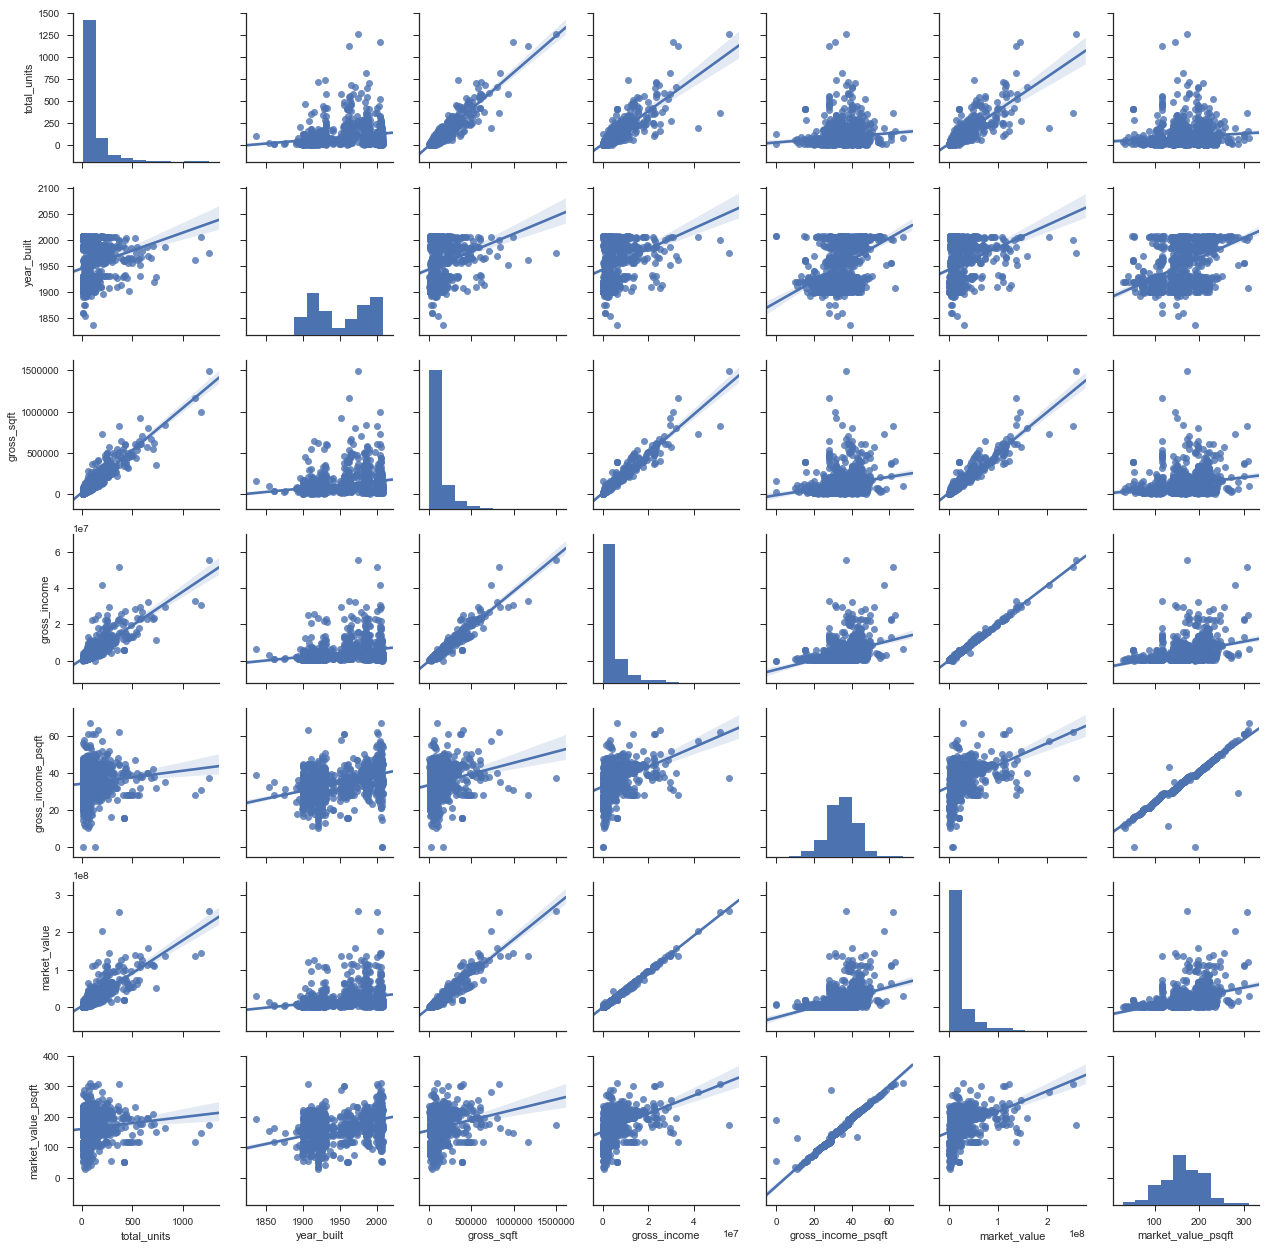

In [13]:
ana_cols = ['building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft']
aa = con_df[ana_cols]

sns.set(style="ticks")
sns.pairplot(aa, kind="reg")
plt.show()

Scatter plots among the features. Some of the features are correlated very well. For example, gross income vs. market value, gross income from per square feet vs. market value per square fit have excellent and positive linear relationship. While gross sqft and market value, total units and market value, gross sqft and gross income, gross sqft and total units have the semi-perfect positive linear relationship. Some the feature pairs (year built and market value per sqft, year built, gross income, etc.) do not have any significant relationship.

## Mapping 

In [14]:
grn_df['Latitude'] = grn_df['Latitude'].astype(float)
grn_df['Longitude'] = grn_df['Longitude'].astype(float)
grn_df = grn_df.dropna(axis=0, subset=['Latitude','Longitude'])

In [15]:
con_df['latitude'] = con_df['latitude'].astype(float)
con_df['longitude'] = con_df['longitude'].astype(float)
con_df = con_df.dropna(axis=0, subset=['latitude','longitude'])

In [16]:
map_1 = folium.Map(location=[40.773752, -73.972679], zoom_start = 12) ## ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]

housings_points = int(con_df['longitude'].describe()['count'])
gardens_points = int(grn_df['Longitude'].describe()['count'])


for i in range(housings_points):
    # Other areas   
    latitude = con_df.iloc[i]['latitude']
    longitude = con_df.iloc[i]['longitude']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#FF0000',
                        fill_color='#FF0000').add_to(map_1)


## green areas  
for i in range(gardens_points):
    latitude = grn_df.iloc[i]['Latitude']
    longitude = grn_df.iloc[i]['Longitude']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#008000',
                        fill_color='#008000').add_to(map_1)
    
map_1

The map shows the locations of condominiums (red dots) in Manhattan and GreenThumb community gardens (green dots). Most of the gardens are located outside the Manhattan, although there are some of the gardens located in upper and lower Manhattan. Few are located in midtown by the times square. The reason for fewer gardens in Manhattan may be the limited space or commercial usages. I will also plot the above data with postcode and label/color the postcode area by gross income and market value. These two maps would give us insight into how housing prices vary when considering spatial context and garden location.

### Groupby postcode

It would be nice if we see how gross income varies in different postcodes. To do that I group the datasets by zip code and average the every condominium attribute for the zip code.

In [17]:
postcodes = con_df.groupby('postcode', as_index = False).agg(np.mean)
postcodes["postcode"] = postcodes["postcode"].apply(lambda x: str(int(x)))
postcodes["postcode"] = postcodes["postcode"].astype(int)

### Color maps

In [18]:
class plot_color_map(object):
    
    def __init__(self, feature):
        self.feature = str(feature)
        self.minc = postcodes[feature].describe()['min']
        self.maxc = postcodes[feature].describe()['max']
        self.colorscale = branca.colormap.linear.YlGnBu.scale(self.minc, self.maxc)
        
    def fill_color(self, geo_feature):
        postal_code = geo_feature['properties']['postalCode']
        aa = postcodes[postcodes['postcode'] == int(postal_code)][self.feature]

        if len(aa) == 0:
            return '#ffffff' ## white
        else:
            return self.colorscale(int(aa))
    
    def create_map(self):
        postcode_map = folium.Map(location=[40.773752, -73.972679],
                                  tiles = "cartodbpositron", zoom_start = 13)

        self.colorscale.caption = self.feature

        folium.GeoJson(
            'nyczipcode.geojson',
            style_function = lambda feature: {
                'fillColor': self.fill_color(feature),
                'color' : 'black',
                'weight' : 0.5,
                'dashArray' : '5, 5'
                }
            ).add_to(postcode_map)

        ## green areas  
        for i in range(gardens_points):
            latitude = grn_df.iloc[i]['Latitude']
            longitude = grn_df.iloc[i]['Longitude']

            folium.CircleMarker([latitude, longitude],
                                radius = 1,
                                color='#008000',
                                fill_color='#008000', ).add_to(postcode_map)

        postcode_map.add_child(self.colorscale)

        return postcode_map


In [19]:
plot_color_map('gross_income').create_map()

The above map shows the how gross income from condominiums is higher in midtown area by the times square. Interestingly there are a couple of gardens located in this area. Gardens might affect the income or market value. I will explore this in the next sections. Gross income is relatively low in both upper and lower Manhattan region.

In [20]:
plot_color_map('market_value').create_map()

Similarly, the gross income map, market value map also shows that condominiums market value is higher in midtown area by the times square compare to upper and lower Manhattan areas.

## Neighborhood Tabulation Area (NTA)

In this section, I focus on the NTA based analysis. Since postcode based map shows some interesting observation, it might be helpful to analyze the data based on NTA. I first group the data based on NTA. I then average the every condominium attribute for the NTA.

### Find expensive NTA

In [21]:
nta = con_df.groupby('NTA', as_index = False).agg(np.mean)

nta_list = np.unique(list(nta['NTA']))

features = ['gross_income', 'gross_income_psqft', 'market_value', 'market_value_psqft']
    

def plot_NTA_rank(basis = np.mean):
    
    y_pos = np.arange(len(nta_list))

    fig = plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):

        market_value = list(nta[feature])

        values = sorted(zip(nta_list, market_value), key=lambda x: x[1] * 1)
        sorted_nta_list, sorted_market_value = zip(*values)

        plt.subplot(2,2,i+1)
        plt.barh(y_pos, sorted_market_value)
        plt.yticks(y_pos, sorted_nta_list, fontsize= 10)
        plt.ylabel('NTA')
        plt.title(str(feature.replace('MANHATTAN CONDOMINIUM PROPERTY', '')).title())

    plt.tight_layout()
    plt.show()

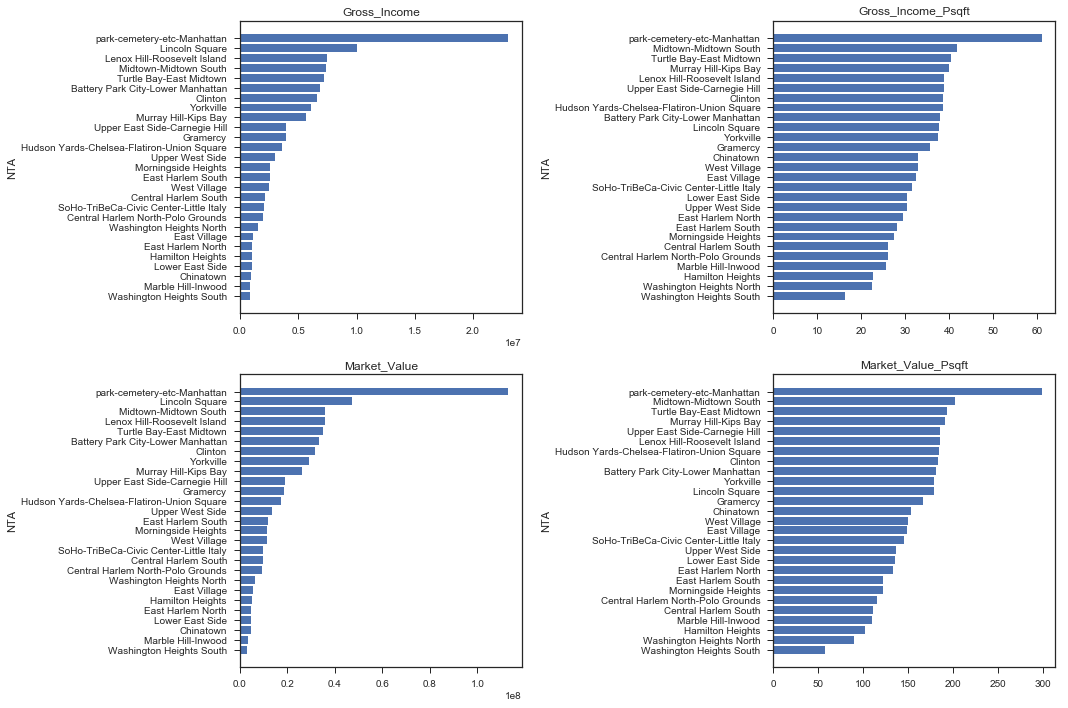

In [22]:
plot_NTA_rank()

The above plot shows NTA expense ranking based on the four attributes ('gross_income', 'gross_income_psqft', 'market_value', 'market_value_psqft'). The expense ranking is calculated based on the average condominium attributes. Interestingly, the ranking based on the median condominium attributes also show the same ranks. Park-cemetery-etc-Manhattan is most expensive NTA in all four of the attributes. The database shows there is only one condo located in this NTA is located right on the central park (1 Central park and built in 1955). Since there is only one condominium in this NTA, I also want to do some analysis on the top three expensive NTAs (LinconIn Square, Midtown-Midtown-South, and Turtle Bay-East Midtown). First look at the map below.

###  NTA map based on Gross Income

In [23]:
feature = 'gross_income'
minc = nta[feature].describe()['min']
maxc = nta[feature].describe()['max']
colorscale = branca.colormap.linear.YlGnBu.scale(minc, maxc)
        
def color_function(i):
    aa = nta.iloc[i][feature]
    cc = colorscale(float(aa))
    return cc
    

postcode_map = folium.Map(location=[40.773752, -73.972679],
                          tiles = "cartodbpositron", zoom_start = 13)

# folium.GeoJson('NTA_map.geojson').add_to(postcode_map)
    
## green areas  
for i in range(len(nta)):
    latitude = nta.iloc[i]['latitude']
    longitude = nta.iloc[i]['longitude']
    color = color_function(i)
    folium.CircleMarker([latitude, longitude],
                        radius = 10,
                        fill=True,
                        fill_color= color_function(i),
                        color = color_function(i),
                        fill_opacity= 1.0).add_to(postcode_map)

## green areas  
for i in range(gardens_points):
    latitude = grn_df.iloc[i]['Latitude']
    longitude = grn_df.iloc[i]['Longitude']

    folium.CircleMarker([latitude, longitude],
                        radius = 1,
                        color='#008000',
                        fill_color= '#008000', ).add_to(postcode_map)

postcode_map.add_child(colorscale)
postcode_map

Bigger filled circles with different color represent each NTA in Manhattan area. The color of each circle indicates the average gross income. From the above map, it is pretty evident that NTAs have gardens in it, have comparatively lower gross-income. On the other hand,  the NTAs in the middle of the Manhattan have relatively higher gross income. The reason for the high total income of NTAs are may be the locations. For example, all the NTA's located in the center of the city, primarily by the times square are expensive. Therefore, positions of the condominiums are one of the keys to determine the income.

### Some other statistical analysis

In [24]:
nta_year = con_df.groupby(['NTA', 'year_built'], as_index = False)['gross_income', 'market_value'].mean()

In [25]:
np.unique(list(nta_year['NTA']))

array(['Battery Park City-Lower Manhattan',
       'Central Harlem North-Polo Grounds', 'Central Harlem South',
       'Chinatown', 'Clinton', 'East Harlem North', 'East Harlem South',
       'East Village', 'Gramercy', 'Hamilton Heights',
       'Hudson Yards-Chelsea-Flatiron-Union Square',
       'Lenox Hill-Roosevelt Island', 'Lincoln Square', 'Lower East Side',
       'Marble Hill-Inwood', 'Midtown-Midtown South',
       'Morningside Heights', 'Murray Hill-Kips Bay',
       'SoHo-TriBeCa-Civic Center-Little Italy', 'Turtle Bay-East Midtown',
       'Upper East Side-Carnegie Hill', 'Upper West Side',
       'Washington Heights North', 'Washington Heights South',
       'West Village', 'Yorkville', 'park-cemetery-etc-Manhattan'],
      dtype='<U42')

In [26]:
lincoln_square = nta_year[nta_year['NTA'] == 'Lincoln Square']
lincoln_square['name'] = "lincoln_square"

midtown_south = nta_year[nta_year['NTA'] == 'Midtown-Midtown South']
midtown_south['name'] = "midtown_south"

turtle_bay_East_midtown = nta_year[nta_year['NTA'] == 'Turtle Bay-East Midtown']
turtle_bay_East_midtown['name'] = "turtle_bay_East_midtown"

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [27]:
frames = [lincoln_square, midtown_south, turtle_bay_East_midtown]
result = pd.concat(frames)

In [28]:
lincoln_square.describe()

year_built  gross_income  market_value
count    37.000000  3.700000e+01  3.700000e+01
mean   1959.540541  1.021067e+07  4.833459e+07
std      35.657783  8.241876e+06  3.969658e+07
min    1900.000000  1.200000e+06  4.969998e+06
25%    1928.000000  3.165690e+06  1.470000e+07
50%    1964.000000  8.898340e+06  4.369999e+07
75%    1988.000000  1.329172e+07  6.520000e+07
max    2007.000000  3.224780e+07  1.580000e+08

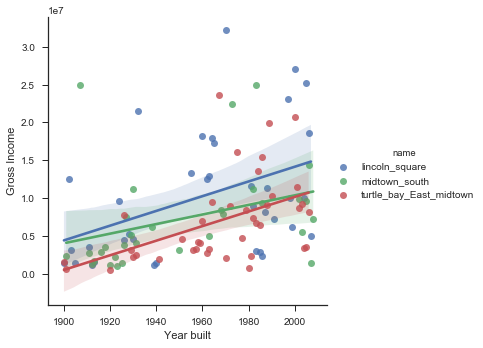

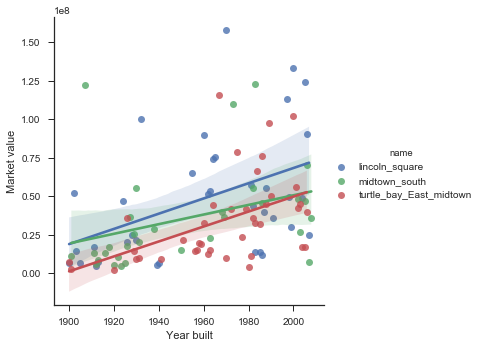

In [29]:
plt.figure(figsize=(8, 4))


sns.lmplot(x= 'year_built', y= 'gross_income',
               truncate=True, size=5, data= result, hue='name')
plt.xlabel('Year built')
plt.ylabel('Gross Income')


# plt.subplot(1, 2, 2)
sns.lmplot(x= 'year_built', y= 'market_value',
               truncate=True, size=5, data= result, hue='name')
plt.xlabel('Year built')
plt.ylabel('Market value')
plt.show()

For each of the NTAs, average gross income and market values are higher for new condominiums, that makes sense. The rate of gross-income increases for lincoln_square, midtown_south while the rate decreases in turtle_bay_East_midtown. The datasets also have some loopy outliers probably bad data, but it’s not going to have a considerable influence.

## Find the effect of greenthumb community garden

This sections focuses on the effect of greenthumb community garden on the housing prices. To do that, I first divid the data into two classes : (1) NTA that have gradens and (2) NTA that have not gardens. And finally plot the features relationship with linear regresssion.

### Classify data

In [30]:
cond_nta_list = []
for i in range(len(nta['NTA'])):
    cond_nta_list.append(str(nta['NTA'][i]).rstrip())

grdn_nta_list = []
for i, grnd_nta in enumerate(np.unique(grn_df['NTA'])):
    grdn_nta_list.append(str(grnd_nta).rstrip())

In [31]:
common_nta = list(set(cond_nta_list) & set(grdn_nta_list))

In [32]:
def check_garden(x):
    nnttaa = x['NTA']
    if str(nnttaa).rstrip() in common_nta:
        return 1
    else:
        return 0

In [33]:
nta['has_garden'] = 0
nta['has_garden'] = nta.apply(check_garden, axis=1)

### Plot feature relationships

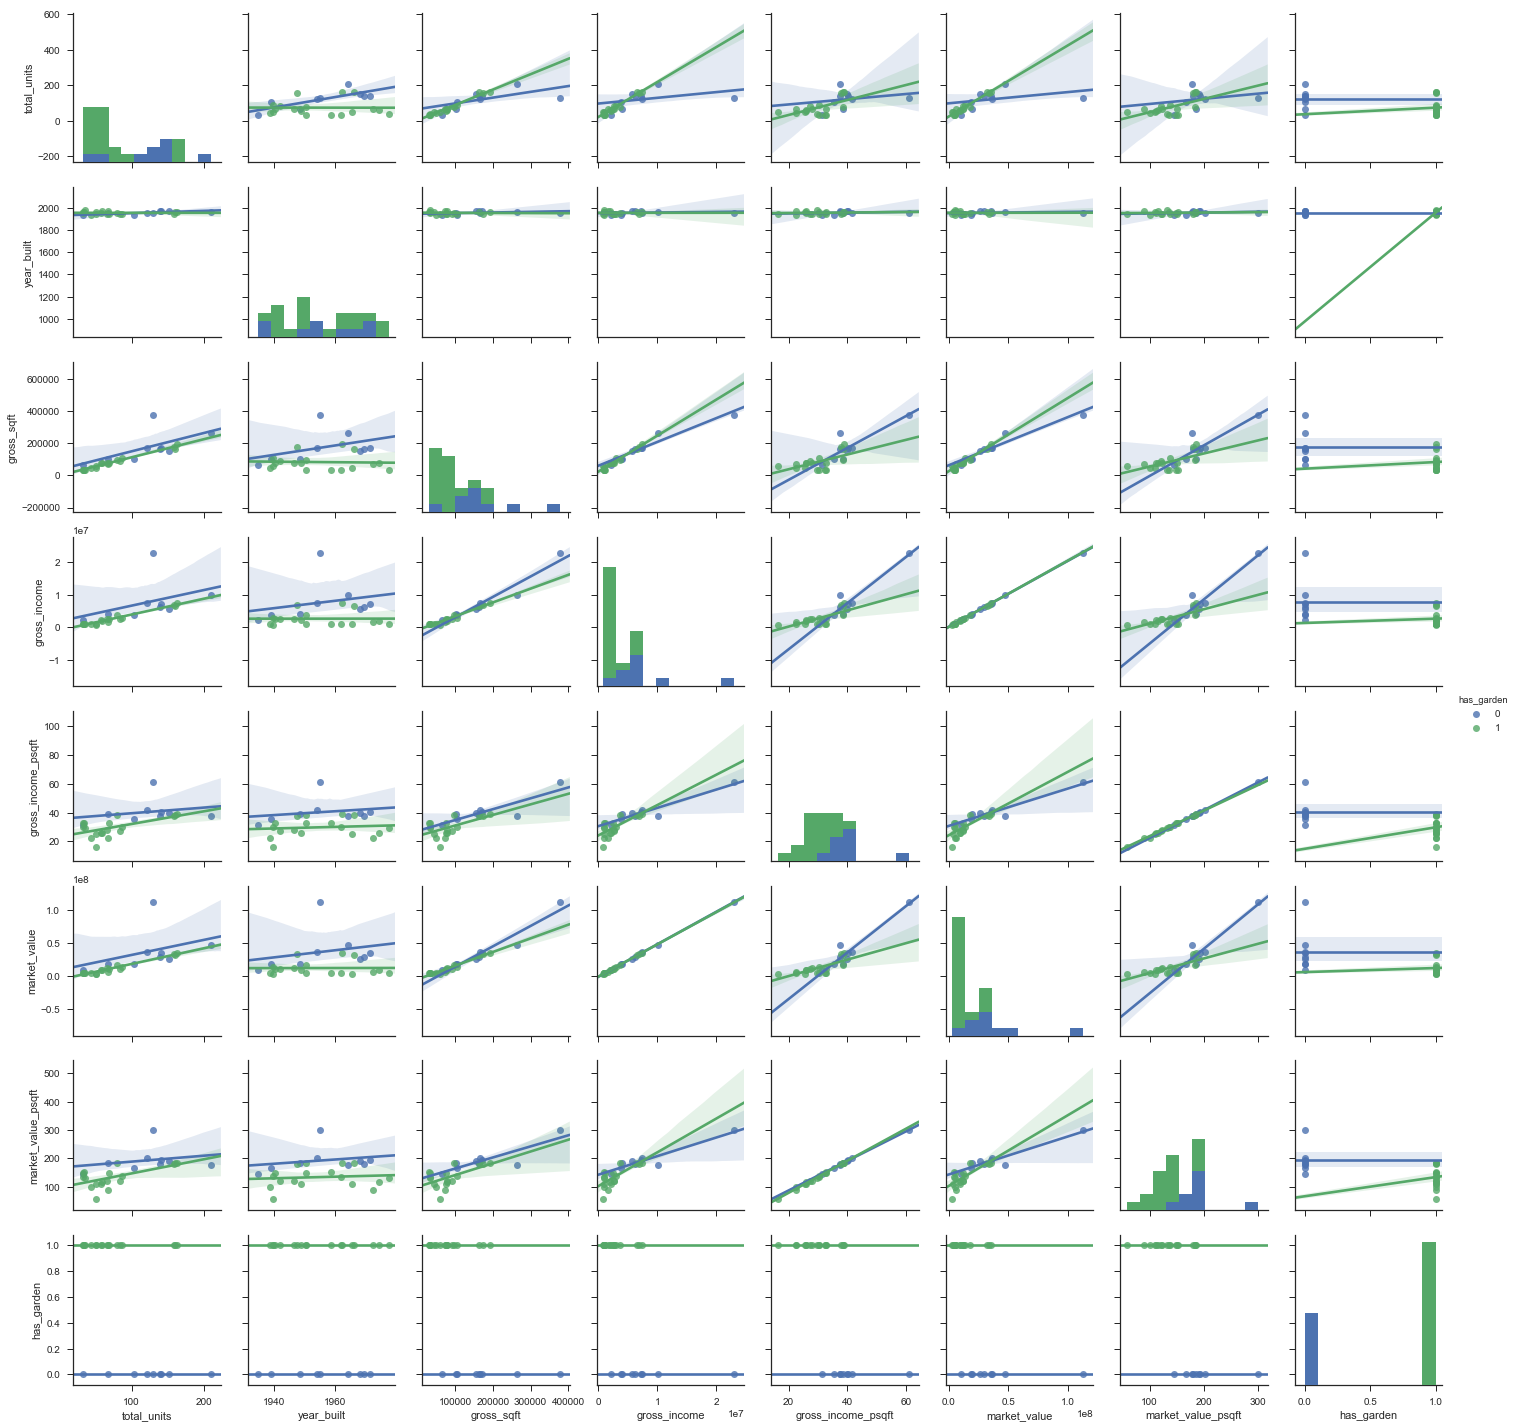

In [34]:
ana_cols = ['total_units', 'year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft']
# aa = nta[ana_cols]

sns.set(style="ticks")
sns.pairplot(data = nta[['total_units', 'year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft', 'has_garden']], kind="reg", hue = 'has_garden')
plt.show()

Green dot represents an NTA have at least one garden while blue dot represents NTA do not have any garden. The above plot is exciting and gives us handy information on the housing prices and their relationship with the presence of garden. For example, new condominiums (built in recent years) in NTA without gardens have higher market value, higher gross income, also have the higher number of total units. While NTAs have gardens, have almost constant gross-income and market value. We also see that no matter NTA have gardens or not, with increasing number of units gross-income and market value increase. The above analysis indicates that gardens areas have affordable housing prices.

### Garden size effect on housing price

In this section, I want to see if the garden size has any effect on the gross income or market value of the condominiums. To do that I first group the GreenThumb data based on NTA. Then I use the average size of the garden in condominium data that has common NTA.

In [35]:
grdn_size = grn_df.groupby(['NTA'], as_index = False).mean()    

In [36]:
grdn_size.describe()

Council District       Size   Latitude  Longitude  Census Tract
count         84.000000  68.000000  84.000000  84.000000     84.000000
mean          21.203932   0.182161  40.738893 -73.922421   5163.993303
std           14.801485   0.299542   0.082947   0.058190  14777.630525
min            0.000000   0.007000  40.575052 -74.103001     26.666667
25%            9.636364   0.073500  40.676517 -73.960936    279.500000
50%           17.250000   0.113150  40.721772 -73.927346    532.000000
75%           34.700000   0.176625  40.819644 -73.890927   2200.750000
max           49.000000   2.296000  40.870293 -73.763133  94201.000000

In [52]:
common = list(set(nta['NTA']) & set(grdn_size['NTA']))

In [67]:
import math

def get_avg_garden_size(x):
    nta_name = x['NTA']
    if str(nta_name) in common:
        size = float(grdn_size[grdn_size['NTA'] == nta_name]['Size'])
        if (math.isnan(size)):
            return 0
        else:
            return size
    else:
        return 0



In [68]:
nta['avg_garden_size'] = 0.0
nta['avg_garden_size'] = nta.apply(get_avg_garden_size, axis=1)

In [70]:
garden_nta = nta[nta['has_garden'] == 1]

In [76]:
garden_nta.describe()['market_value']

count    1.800000e+01
mean     1.233097e+07
std      1.054999e+07
min      2.842000e+06
25%      4.818855e+06
50%      9.422524e+06
75%      1.310013e+07
max      3.568016e+07
Name: market_value, dtype: float64

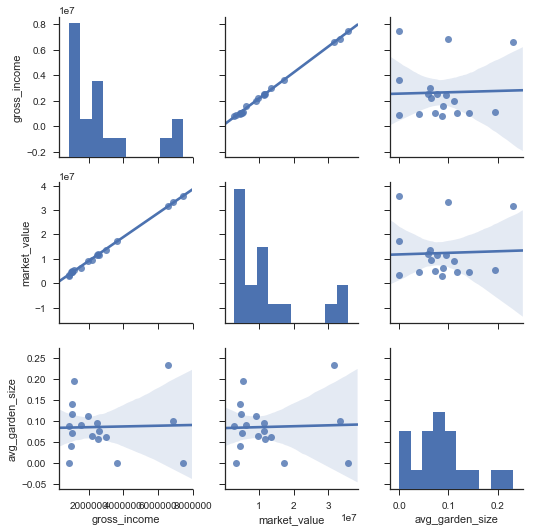

In [79]:
sns.pairplot(data = garden_nta[['gross_income','market_value', 'avg_garden_size']], kind="reg")
plt.show()

The graph shows that there is no relationship between average garden size with gross income and market value. 

### Final remarks

My analysis is consistent with the recent 2016 New York Times report. As the amount of available land decreases like in midtown by the times square, <a href = "https://www.nytimes.com/2016/01/23/nyregion/community-gardens-imperiled-by-new-yorksaffordable-housing-plans.html">"real estate prices continue to climb, some gardens have been targeted by the city, while others are being eyed by developers </a>.

## Conclusion

<li> Community garden areas are affordable for housing and rental prices.
<li> Midtown areas, where gardens are few or absent have increasing real estate prices.
<li> Areas with garden continuously have low housing price over the years despite the increasing number of units which is opposite in areas without gardens (midtown notably).